# Convolutional Neural Network (CNN) for MNIST Classification

## Overview
This code implements a **Convolutional Neural Network (CNN) using PyTorch** to classify handwritten digits from the **MNIST dataset**. The model learns to recognize digits (0-9) through training on thousands of grayscale images.

## Features
- **Dataset**: MNIST (60,000 training images, 10,000 test images)
- **CNN Architecture**:
  - Two convolutional layers with ReLU activation
  - Max pooling for feature reduction
  - Fully connected layers for classification
- **Training Pipeline**:
  - CrossEntropy Loss
  - Adam Optimizer
  - Batch processing with DataLoader
- **Evaluation & Visualization**:
  - Test Accuracy Calculation
  - Training Loss Curve
  - Accuracy Over Time Graph

## Expected Output
The script will print training loss and test accuracy for each epoch, followed by two visualizations:
1. **Loss Curve** – Tracks loss reduction over epochs.
2. **Test Accuracy Over Time** – Shows how accuracy improves during training.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
# Define transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)



100%|██████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 7.56MB/s]
100%|███████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 248kB/s]
100%|██████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.31MB/s]
100%|██████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.96MB/s]


In [13]:
# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
# Initialize model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [15]:
# Training loop
epochs = 5
train_loss_history = []
test_accuracy_history = []

def evaluate_model():
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    test_accuracy = evaluate_model()
    test_accuracy_history.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch [1/5], Loss: 0.2003, Test Accuracy: 0.9802
Epoch [2/5], Loss: 0.0550, Test Accuracy: 0.9861
Epoch [3/5], Loss: 0.0374, Test Accuracy: 0.9880
Epoch [4/5], Loss: 0.0289, Test Accuracy: 0.9875
Epoch [5/5], Loss: 0.0225, Test Accuracy: 0.9884


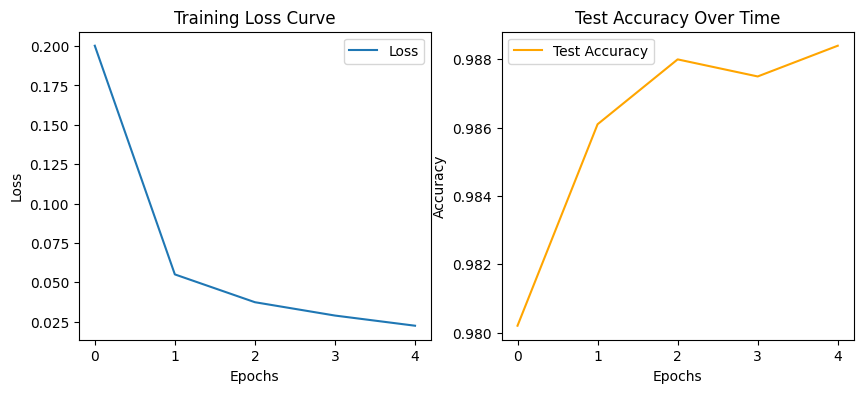

In [16]:
# Plot loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), test_accuracy_history, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Time')
plt.legend()

plt.show()

In [9]:
# Final Model Accuracy
print(f'Final Test Accuracy: {test_accuracy_history[-1]:.4f}')

Final Test Accuracy: 0.9885
